### 1. Requirement

In [1]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np

A_to_au_conversion = 1.8897259885789

### 2. Define Function

In [3]:
print(np.sum([0.0004657649521113563, 0.0004411611281284908, 0.0003922324865460455, 0.00040329095637935857]))
print(np.sum([-0.004245495796910958, -0.004245495796910958, -0.004245495796910959, -0.004245495796910959, ]))
print(-0.19704583088892447+0.19654576938195492)

0.0017024495231652511
-0.016981983187643837


In [4]:
a = [-0.7518459368308964, -0.0005290993832201118, -0.00053210562971568, -0.0005117967645011712, 0.0004657649521113563, 0.0004411611281284908, 0.0003922324865460455, 0.00040329095637935857, -0.007695915857330607, -0.007655327690766813, -0.007756890162357033, -0.5992549793275459, -0.004108489849182961, -0.12160613341001913, -0.004139708107464165, 0.15198123365725247]
b = [-0.7518459368308964, -0.0005290993832201113, -0.0005321056297156802, -0.0005117967645011708, 0.0004657649521113576, 0.00044116112812848886, 0.00039223248654604695, 0.0004032909563793589, -0.007695915857330608, -0.007655327690766812, -0.007756890162357032, -0.5992549793275459, -0.004108489849182962, -0.12160613341001913, -0.004139708107464165, 0.15198123365725247]
c = [-0.751666452326779, -0.0005475737230550865, -0.0005475737230550865, -0.0005475737230550865, -0.004245495796910958, -0.004245495796910958, -0.004245495796910959, -0.004245495796910959, -0.0072517004057860565, -0.007251700405786058, -0.007251700405786058, -0.5993071279969807, -0.004109507910879848, -0.12161287831192921, -0.004177062064275591, 0.1520071801369031]


print(np.sum(a))
print(np.sum(b))
print(np.sum(c))

-1.3519526998325824
-1.3519526998325824
-1.3692456540481088


In [20]:
a = [-0.7518459368308964, -0.0005290993832201118, -0.00053210562971568, -0.0005117967645011712, 0.0004657649521113563]
b = [-0.7518459368308964, -0.0005290993832201113, -0.0005321056297156802, -0.0005117967645011708, 0.0004657649521113576]
c = [-0.751666452326779, -0.0005475737230550865, -0.0005475737230550865, -0.0005475737230550865, -0.004245495796910958]

print(np.sum(a))
print(np.sum(b))
print(np.sum(c))

-0.752953173656222
-0.752953173656222
-0.7575546692928553


In [33]:


import numpy as np

fci_energy = -1.5657914234987094
b = [-0.08626541638865365, 0.0, -0.001269304075906834, 0.00020041643303792114, -0.0015984895012225637, -0.0008315691349378286, -0.0008653308005179404, 0.0034275615364916497, 0.19326862439672202, -0.00022963624793781272, 0.0003013116947671017, 0.00013635913619949413, 0.38982683516892114, -0.0018467293397812935, 0.5758621808466122, 0.0035615494410067795, 0.46733685791418894]
c = [-0.08633222186633294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19240364906562057, 0.0, 0.0, 0.0, 0.3873205596363607, 0.0, 0.5775770009478376, 0.0, 0.46733685791418894]

# Sum values after rounding to Rounded decimal places

b = b[:9]
c = c[:9]

rounding = 10

sum_b = sum(round(x, rounding) for x in b)
sum_c = sum(round(x, rounding) for x in c)

print("Sum of rounded values in b:", sum_b)
print("Sum of rounded values in c:", sum_c)

print("FCI Energy:", fci_energy)

print("Chemical Accuracy Error in b:", np.abs(sum_b-fci_energy))
print("Chemical Accuracy Error in c:", np.abs(sum_c-fci_energy))

print(np.array(b)-np.array(c))
print(sum_b - sum_c)


Sum of rounded values in b: 0.1060664924
Sum of rounded values in c: 0.10607142719999998
FCI Energy: -1.5657914234987094
Chemical Accuracy Error in b: 1.6718579158987095
Chemical Accuracy Error in c: 1.6718628506987094
[ 6.68054777e-05  0.00000000e+00 -1.26930408e-03  2.00416433e-04
 -1.59848950e-03 -8.31569135e-04 -8.65330801e-04  3.42756154e-03
  8.64975331e-04]
-4.934799999981032e-06


In [66]:
import numpy as np

fci_energy = -1.5657914234987094
a = [-0.7518459368308964, -0.0005290993832201118, -0.00053210562971568, -0.0005117967645011712, 0.0004657649521113563, 0.0004411611281284908, 0.0003922324865460455, 0.00040329095637935857, -0.19704583088892447, -0.007695915857330607, -0.007655327690766813, -0.007756890162357033, -0.5992549793275459, -0.004108489849182961, -0.12160613341001913, -0.004139708107464165, 0.15198123365725247]
b = [-0.7518459368308964, -0.0005290993832201113, -0.0005321056297156802, -0.0005117967645011708, 0.0004657649521113576, 0.00044116112812848886, 0.00039223248654604695, 0.0004032909563793589, -0.1970458308889245, -0.007695915857330608, -0.007655327690766812, -0.007756890162357032, -0.5992549793275459, -0.004108489849182962, -0.12160613341001913, -0.004139708107464165, 0.15198123365725247]
c = [-0.751666452326779, -0.0005475737230550865, -0.0005475737230550865, -0.0005475737230550865, -0.004245495796910958, -0.004245495796910958, -0.004245495796910959, -0.004245495796910959, -0.19654576938195492, -0.0072517004057860565, -0.007251700405786058, -0.007251700405786058, -0.5993071279969807, -0.004109507910879848, -0.12161287831192921, -0.004177062064275591, 0.1520071801369031]

# Sum values after rounding to Rounded decimal places

n=18
a = a[:n]
b = b[:n]
c = c[:n]

rounding = 10

sum_a = sum(round(x, rounding) for x in a)
sum_b = sum(round(x, rounding) for x in b)
sum_c = sum(round(x, rounding) for x in c)


print("Sum of rounded values in a:", sum_a)
print("Sum of rounded values in b:", sum_b)
print("Sum of rounded values in c:", sum_c)

print("FCI Energy:", fci_energy)

print("Chemical Accuracy Error in a:", np.abs(sum_a-fci_energy))
print("Chemical Accuracy Error in b:", np.abs(sum_b-fci_energy))
print("Chemical Accuracy Error in c:", np.abs(sum_c-fci_energy))

print(np.array(b)-np.array(c))
print(sum_b - sum_c)


Sum of rounded values in a: -1.5489985306
Sum of rounded values in b: -1.5489985306
Sum of rounded values in c: -1.5657914233999999
FCI Energy: -1.5657914234987094
Chemical Accuracy Error in a: 0.016792892898709333
Chemical Accuracy Error in b: 0.016792892898709333
Chemical Accuracy Error in c: 9.870948503021282e-11
[-1.79484504e-04  1.84743398e-05  1.54680933e-05  3.57769586e-05
  4.71126075e-03  4.68665693e-03  4.63772828e-03  4.64878675e-03
 -5.00061507e-04 -4.44215452e-04 -4.03627285e-04 -5.05189757e-04
  5.21486694e-05  1.01806170e-06  6.74490191e-06  3.73539568e-05
 -2.59464797e-05]
0.016792892799999848


In [72]:
from openfermion.ops import QubitOperator

hamiltonian = (
    -7.4989469 * QubitOperator('') +
    -0.0029329 * QubitOperator('Y0 Y1 X2 X3') +
    0.0029329 * QubitOperator('Y0 X1 X2 Y3') +
    0.0129108 * QubitOperator('X0 Z1 X2') +
    -0.0013743 * QubitOperator('X0 Z1 X2 Z3') +
    0.0115364 * QubitOperator('X0  X2') +
    0.0029329 * QubitOperator('X0 X1 Y2 Y3') +
    -0.0029320 * QubitOperator('X0 Y1 Y2 X3') +
    0.0129108 * QubitOperator('Y0 Z1 Y2') +
    -0.0013743 * QubitOperator('Y0 Z1 Y2 Z3') +
    0.0115364 * QubitOperator('Y0  Y2') +
    0.1619948 * QubitOperator('Z0  ') +
    0.0115364 * QubitOperator('X0 Z1 X2 Z3') +
    0.0115364 * QubitOperator('Y0 Z1 Y2 Z3') +
    0.1244477 * QubitOperator('Z0 Z1 ') +
    0.0541304 * QubitOperator('Z0  Z2') +
    0.0570634 * QubitOperator('Z0   Z3') +
    0.0129108 * QubitOperator(' X1 Z2 X3') +
    -0.0013743 * QubitOperator(' X1 X2') +
    0.0129107 * QubitOperator(' Y1 Z2 Y3') +
    -0.0013743 * QubitOperator(' Y1 Y2') +
    0.1619948 * QubitOperator(' Z1 ') +
    0.0570634 * QubitOperator(' Z1 Z2') +
    0.0541304 * QubitOperator(' Z1  Z3') +
    -0.0132437 * QubitOperator('  Z2') +
    0.0847961 * QubitOperator('  Z2 Z3') +
    -0.0132436 * QubitOperator('   Z3')
)

hamiltonian

-7.4989469 [] +
0.0029329 [X0 X1 Y2 Y3] +
-0.002932 [X0 Y1 Y2 X3] +
0.0129108 [X0 Z1 X2] +
0.0101621 [X0 Z1 X2 Z3] +
0.0115364 [X0 X2] +
0.0029329 [Y0 X1 X2 Y3] +
-0.0029329 [Y0 Y1 X2 X3] +
0.0129108 [Y0 Z1 Y2] +
0.0101621 [Y0 Z1 Y2 Z3] +
0.0115364 [Y0 Y2] +
0.1619948 [Z0] +
0.1244477 [Z0 Z1] +
0.0541304 [Z0 Z2] +
0.0570634 [Z0 Z3] +
-0.0013743 [X1 X2] +
0.0129108 [X1 Z2 X3] +
-0.0013743 [Y1 Y2] +
0.0129107 [Y1 Z2 Y3] +
0.1619948 [Z1] +
0.0570634 [Z1 Z2] +
0.0541304 [Z1 Z3] +
-0.0132437 [Z2] +
0.0847961 [Z2 Z3] +
-0.0132436 [Z3]

In [74]:
from openfermion.ops import QubitOperator

hamiltonian = (
    -7.4989469 * QubitOperator('') +
    -0.0029329 * QubitOperator('Y0 Y1 X2 X3') +
    0.0029329 * QubitOperator('Y0 X1 X2 Y3') +
    0.0129108 * QubitOperator('X0 Z1 X2') +
    -0.0013743 * QubitOperator('X0 Z1 X2 Z3') +
    0.0115364 * QubitOperator('X0 X2') +
    0.0029329 * QubitOperator('X0 X1 Y2 Y3') +
    -0.0029320 * QubitOperator('X0 Y1 Y2 X3') +
    0.0129108 * QubitOperator('Y0 Z1 Y2') +
    -0.0013743 * QubitOperator('Y0 Z1 Y2 Z3') +
    0.0115364 * QubitOperator('Y0 Y2') +
    0.1619948 * QubitOperator('Z0') +
    0.0115364 * QubitOperator('X0 Z1 X2 Z3') +
    0.0115364 * QubitOperator('Y0 Z1 Y2 Z3') +
    0.1244477 * QubitOperator('Z0 Z1') +
    0.0541304 * QubitOperator('Z0 Z2') +
    0.0570634 * QubitOperator('Z0 Z3') +
    0.0129108 * QubitOperator('X1 Z2 X3') +
    -0.0013743 * QubitOperator('X1 X2') +
    0.0129107 * QubitOperator('Y1 Z2 Y3') +
    -0.0013743 * QubitOperator('Y1 Y2') +
    0.1619948 * QubitOperator('Z1') +
    0.0570634 * QubitOperator('Z1 Z2') +
    0.0541304 * QubitOperator('Z1 Z3') +
    -0.0132437 * QubitOperator('Z2') +
    0.0847961 * QubitOperator('Z2 Z3') +
    -0.0132436 * QubitOperator('Z3')
)

hamiltonian


-7.4989469 [] +
0.0029329 [X0 X1 Y2 Y3] +
-0.002932 [X0 Y1 Y2 X3] +
0.0129108 [X0 Z1 X2] +
0.0101621 [X0 Z1 X2 Z3] +
0.0115364 [X0 X2] +
0.0029329 [Y0 X1 X2 Y3] +
-0.0029329 [Y0 Y1 X2 X3] +
0.0129108 [Y0 Z1 Y2] +
0.0101621 [Y0 Z1 Y2 Z3] +
0.0115364 [Y0 Y2] +
0.1619948 [Z0] +
0.1244477 [Z0 Z1] +
0.0541304 [Z0 Z2] +
0.0570634 [Z0 Z3] +
-0.0013743 [X1 X2] +
0.0129108 [X1 Z2 X3] +
-0.0013743 [Y1 Y2] +
0.0129107 [Y1 Z2 Y3] +
0.1619948 [Z1] +
0.0570634 [Z1 Z2] +
0.0541304 [Z1 Z3] +
-0.0132437 [Z2] +
0.0847961 [Z2 Z3] +
-0.0132436 [Z3]

In [77]:
!pip install qiskit_nature

  Using cached qiskit_nature-0.7.2-py3-none-any.whl.metadata (8.0 kB)
Using cached qiskit_nature-0.7.2-py3-none-any.whl (2.2 MB)


In [5]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper, BravyiKitaevMapper

from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom="Li 0 0 0; H 0 0 1.45",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

# driver = PySCFDriver()


problem = driver.run()
fermionic_op = problem.hamiltonian.second_q_op()

# mapper = ParityMapper(num_particles=problem.num_particles)
mapper = BravyiKitaevMapper()
tapered_mapper = problem.get_tapered_mapper(mapper, z2symmetries=)

qubit_op = tapered_mapper.map(fermionic_op)
print(qubit_op)

SparsePauliOp(['IIIIIIII', 'IIIIIIIZ', 'IIZZIZZZ', 'IIZZIZZI', 'IIZZIZXZ', 'IIZZIZXI', 'IIIIIIXI', 'IIIIIIXZ', 'IIIIIXIZ', 'IIIIIXII', 'IZZZIXZI', 'IZZZIXZZ', 'IIIIIIZI', 'IIIIIIZZ', 'IIZZIYYI', 'IIZZIYYZ', 'IZZZIXXI', 'IZZZIXXZ', 'IIZZIIII', 'IIZZIIIZ', 'IZIIIIII', 'IZIIIIIZ', 'IZIIIZII', 'IZIIIZIZ', 'IIIIZIII', 'IIIIZIIZ', 'ZIIIXIII', 'ZIIIXIIZ', 'IIIIXIII', 'IIIIXIIZ', 'YIXYXIII', 'YIXYXIIZ', 'YIXXYIII', 'YIXXYIIZ', 'XIIIXIII', 'XIIIXIIZ', 'YZZIYIII', 'YZZIYIIZ', 'ZIIIZIII', 'ZIIIZIIZ', 'YIXYZIII', 'YIXYZIIZ', 'XIXXIIII', 'XIXXIIIZ', 'XIIIZIII', 'XIIIZIIZ', 'XZZIIIII', 'XZZIIIIZ', 'IIIZIIII', 'IIIZIIIZ', 'ZIXXIIII', 'ZIXXIIIZ', 'IZYYIIII', 'IZYYIIIZ', 'ZZZIIIII', 'ZZZIIIIZ', 'IIZZIZXX', 'IIIIIIYY', 'IIZZIZYY', 'IIIIIIXX', 'IIIIIXIX', 'IIZZIYZY', 'IZIIIYIY', 'IZZZIXZX', 'IIZZIZZX', 'IIZZIZIX', 'IIIIIIIX', 'IIIIIIZX', 'IIIIIXXX', 'IZIIIYYX', 'IIZZIYXY', 'IZIIIYXY', 'IIZZIYYX', 'IZZZIXXX', 'IIIIIZZX', 'IIZZIIIX', 'IZZZIZZX', 'IZIIIIIX', 'IZZZIIZX', 'IZIIIZIX', 'IIZZZZZX', 'IIIIZIIX', '

In [83]:
print(qubit_op.group_commuting(qubit_wise=True))
print(len(qubit_op.group_commuting(qubit_wise=True)))

[SparsePauliOp(['ZXXXYZXY', 'ZIXXYZXY', 'IIIXIIXI', 'ZIIIIIXI', 'IXXIIIII', 'IIIXIZII', 'ZIIIIZII', 'IIIIIZXI', 'ZIIXIIII', 'IIXIIIII', 'IIIIIIXI', 'IIIIIZII', 'IIIXIIII', 'ZIIIIIII', 'IXIIIIII', 'IIIIIIII'],
              coeffs=[-2.45505788e-03+0.j, -2.45505788e-03+0.j,  2.93296903e-03+0.j,
  1.03902477e-02+0.j,  1.03374571e-02+0.j,  1.03902477e-02+0.j,
  1.14230642e-01+0.j,  2.71447865e-03+0.j,  2.71447865e-03+0.j,
  1.03374571e-02+0.j, -7.84490619e-03+0.j, -4.04158775e-01+0.j,
 -7.84490619e-03+0.j, -4.04158775e-01+0.j,  8.43456976e-03+0.j,
 -5.02549632e+00+0.j]), SparsePauliOp(['YXXXYYXY', 'YXXXYIXI', 'YXXXYIII', 'YXXIYIII', 'IIIXIYXY', 'YXIIIYII', 'IIIIIYXY', 'YIIIIYII', 'IIIIIYIY'],
              coeffs=[ 0.00162112+0.j, -0.00023946+0.j, -0.00088292+0.j, -0.00061529+0.j,
 -0.00023946+0.j, -0.00482139+0.j, -0.00088292+0.j, -0.00482139+0.j,
 -0.00061529+0.j]), SparsePauliOp(['XXYXYZXX', 'XXYIYIII', 'XXIIIZXX', 'IXYXYIII', 'XIIIIZXX', 'IIYXYIII', 'IIIXIIIX', 'IIIIIIXX', 'IIIIIZIX', 

In [75]:
hamiltonian.__dict__

{'terms': {(): -7.4989469,
  ((0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')): -0.0029329,
  ((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')): 0.0029329,
  ((0, 'X'), (1, 'Z'), (2, 'X')): 0.0129108,
  ((0, 'X'), (1, 'Z'), (2, 'X'), (3, 'Z')): 0.0101621,
  ((0, 'X'), (2, 'X')): 0.0115364,
  ((0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')): 0.0029329,
  ((0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')): -0.002932,
  ((0, 'Y'), (1, 'Z'), (2, 'Y')): 0.0129108,
  ((0, 'Y'), (1, 'Z'), (2, 'Y'), (3, 'Z')): 0.0101621,
  ((0, 'Y'), (2, 'Y')): 0.0115364,
  ((0, 'Z'),): 0.1619948,
  ((0, 'Z'), (1, 'Z')): 0.1244477,
  ((0, 'Z'), (2, 'Z')): 0.0541304,
  ((0, 'Z'), (3, 'Z')): 0.0570634,
  ((1, 'X'), (2, 'Z'), (3, 'X')): 0.0129108,
  ((1, 'X'), (2, 'X')): -0.0013743,
  ((1, 'Y'), (2, 'Z'), (3, 'Y')): 0.0129107,
  ((1, 'Y'), (2, 'Y')): -0.0013743,
  ((1, 'Z'),): 0.1619948,
  ((1, 'Z'), (2, 'Z')): 0.0570634,
  ((1, 'Z'), (3, 'Z')): 0.0541304,
  ((2, 'Z'),): -0.0132437,
  ((2, 'Z'), (3, 'Z')): 0.0847961,
  ((3, 'Z'),): -0.0132436}}

In [65]:
from qiskit.quantum_info import SparsePauliOp
hamiltonian = SparsePauliOp.from_list([("IIII", -7.4989469), ("XXYY", -0.0029329),
                                       ("XYYX", 0.0029329), ("XZXI", 0.0129108),
                                       ("XZXZ", -0.0013743), ("XIXI", 0.0115364),
                                       ("YXXY", 0.0029329), ("YYXX", -0.0029320),
                                       ("YZYI", 0.0129108), ("YZYZ", -0.0013743),
                                       ("YIYI", 0.0115364), ("ZIII", 0.1619948),
                                       ("ZXZX", 0.0115364), ("ZYZY", 0.0115364),
                                       ("ZZII", 0.1244477), ("ZIZI", 0.0541304),
                                       ("ZIIZ", 0.0570634), ("IXZX", 0.0129108),
                                       ("IXIX", -0.0013743), ("IYZY", 0.0129107),
                                       ("IYIY", -0.0013743), ("IZII", 0.1619948),
                                       ("IZZI", 0.0570634), ("IZIZ", 0.0541304),
                                       ("IIZI", -0.0132437), ("IIZZ", 0.0847961),
                                       ("IIIZ", -0.0132436)
                                       ])

commuted_hamiltonian = hamiltonian.group_commuting(qubit_wise=True)
commuted_hamiltonian

[SparsePauliOp(['XXYY', 'IIII'],
               coeffs=[-2.9329000e-03+0.j, -7.4989469e+00+0.j]),
 SparsePauliOp(['XYYX'],
               coeffs=[0.0029329+0.j]),
 SparsePauliOp(['YXXY'],
               coeffs=[0.0029329+0.j]),
 SparsePauliOp(['YYXX'],
               coeffs=[-0.002932+0.j]),
 SparsePauliOp(['XZXI', 'XZXZ', 'XIXI', 'IZII', 'IZIZ', 'IIIZ'],
               coeffs=[ 0.0129108+0.j, -0.0013743+0.j,  0.0115364+0.j,  0.1619948+0.j,
   0.0541304+0.j, -0.0132436+0.j]),
 SparsePauliOp(['YZYI', 'YZYZ', 'YIYI'],
               coeffs=[ 0.0129108+0.j, -0.0013743+0.j,  0.0115364+0.j]),
 SparsePauliOp(['ZXZX', 'IXZX', 'IXIX', 'ZIII', 'ZIZI', 'IIZI'],
               coeffs=[ 0.0115364+0.j,  0.0129108+0.j, -0.0013743+0.j,  0.1619948+0.j,
   0.0541304+0.j, -0.0132437+0.j]),
 SparsePauliOp(['ZYZY', 'IYZY', 'IYIY'],
               coeffs=[ 0.0115364+0.j,  0.0129107+0.j, -0.0013743+0.j]),
 SparsePauliOp(['ZZII', 'ZIIZ', 'IZZI', 'IIZZ'],
               coeffs=[0.1244477+0.j, 0.0570634+0.j, 0

In [37]:
print(len(a))

17


In [30]:
# shots = [200 for _ in range(len(b))]
error = np.array(b)-np.array(c)
error_sum = np.mean(error)
print(error)
print(error_sum)

[-1.79484504e-04  1.84743398e-05  1.54680933e-05  3.57769586e-05
  4.71126075e-03  4.68665693e-03  4.63772828e-03  4.64878675e-03
 -5.00061507e-04 -4.44215452e-04 -4.03627285e-04 -5.05189757e-04
  5.21486694e-05  1.01806170e-06  6.74490191e-06  3.73539568e-05
 -2.59464797e-05]
0.0009878172181503938


In [29]:
import matplotlib.pyplot as plt

# Compute error for each clique
errors = np.abs(b - c)

# Create bar plot
plt.bar(range(len(errors)), errors, label="Error per Clique")
plt.axhline(err_val, color='r', linestyle='--', label="Average Error")
plt.xlabel('Clique Index')
plt.ylabel('Error')
plt.title('Error per Clique vs Average Error')
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [32]:
len(b)

17

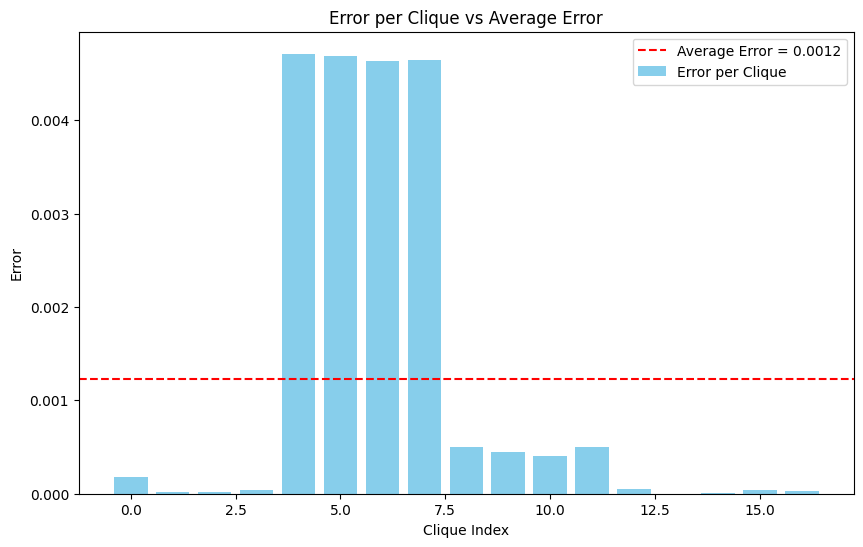

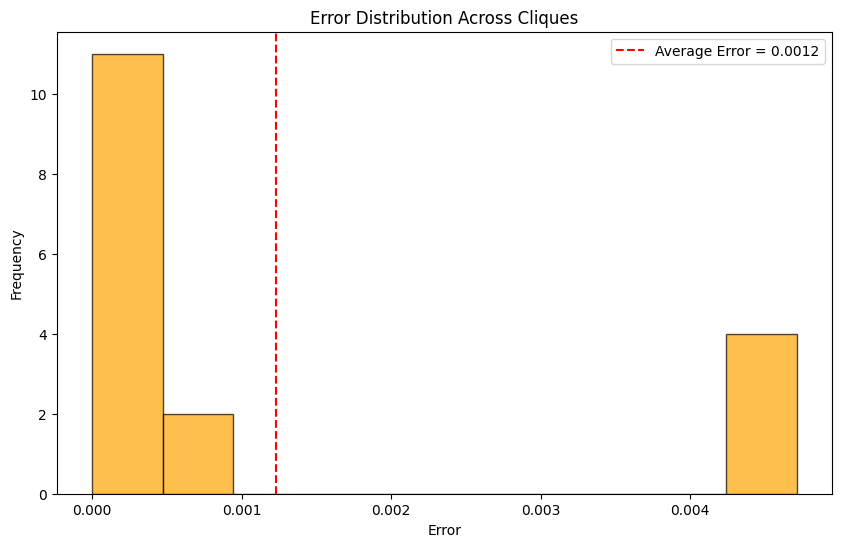

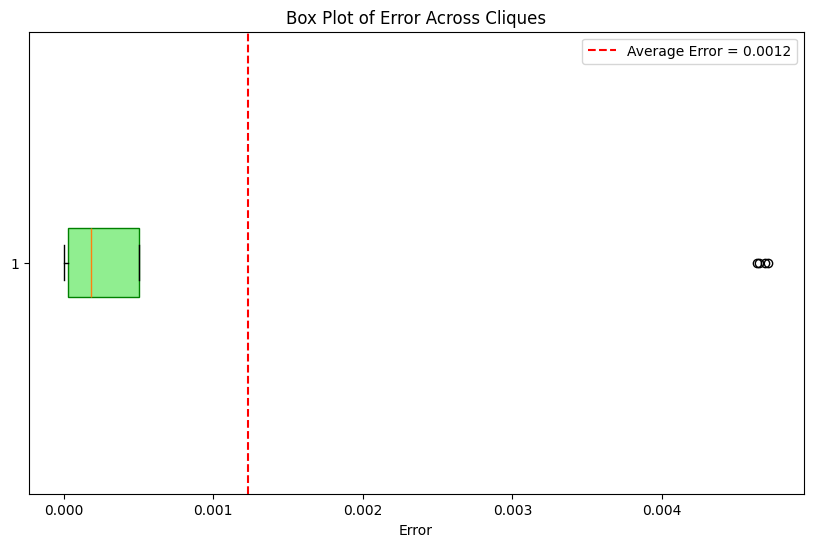

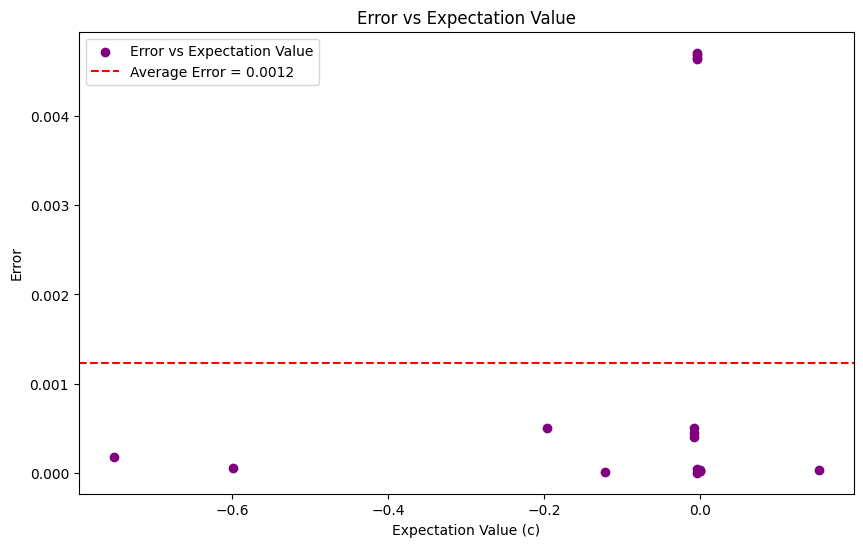

ValueError: cannot reshape array of size 17 into shape (4,4)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for b and c (shot-based and statevector expectation values)
b = [-0.7518459368308964, -0.0005290993832201113, -0.0005321056297156802, -0.0005117967645011708, 0.0004657649521113576, 0.00044116112812848886, 0.00039223248654604695, 0.0004032909563793589, -0.1970458308889245, -0.007695915857330608, -0.007655327690766812, -0.007756890162357032, -0.5992549793275459, -0.004108489849182962, -0.12160613341001913, -0.004139708107464165, 0.15198123365725247]
c = [-0.751666452326779, -0.0005475737230550865, -0.0005475737230550865, -0.0005475737230550865, -0.004245495796910958, -0.004245495796910958, -0.004245495796910959, -0.004245495796910959, -0.19654576938195492, -0.0072517004057860565, -0.007251700405786058, -0.007251700405786058, -0.5993071279969807, -0.004109507910879848, -0.12161287831192921, -0.004177062064275591, 0.1520071801369031]

# Calculate the error for each clique
errors = np.abs(np.array(b) - np.array(c))

# Calculate the average error
err_val = np.mean(errors)

# 1. Bar Plot of the Error per Clique
plt.figure(figsize=(10, 6))
plt.bar(range(len(errors)), errors, label="Error per Clique", color='skyblue')
plt.axhline(err_val, color='r', linestyle='--', label=f"Average Error = {err_val:.4f}")
plt.xlabel('Clique Index')
plt.ylabel('Error')
plt.title('Error per Clique vs Average Error')
plt.legend()
plt.show()

# 2. Histogram of Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=10, edgecolor='black', alpha=0.7, color='orange')
plt.axvline(err_val, color='r', linestyle='--', label=f"Average Error = {err_val:.4f}")
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution Across Cliques')
plt.legend()
plt.show()

# 3. Box Plot for Error Across Cliques
plt.figure(figsize=(10, 6))
plt.boxplot(errors, vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen", color="green"))
plt.axvline(err_val, color='r', linestyle='--', label=f"Average Error = {err_val:.4f}")
plt.xlabel('Error')
plt.title('Box Plot of Error Across Cliques')
plt.legend()
plt.show()

# 4. Scatter Plot of Error vs Expectation Value
plt.figure(figsize=(10, 6))
plt.scatter(c, errors, label='Error vs Expectation Value', color='purple')
plt.axhline(err_val, color='r', linestyle='--', label=f"Average Error = {err_val:.4f}")
plt.xlabel('Expectation Value (c)')
plt.ylabel('Error')
plt.title('Error vs Expectation Value')
plt.legend()
plt.show()

# 5. Heatmap (If Applicable)
# If the errors can be reshaped into a grid, for example, 4x4 (you can adjust this to fit your actual data structure)
error_grid = errors.reshape(4, 4)  # Example reshape, adjust dimensions as necessary
plt.figure(figsize=(10, 6))
sns.heatmap(error_grid, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Heatmap of Error Across Cliques')
plt.show()

# 6. Time Evolution (If Applicable, assuming you have time or iteration steps)
# This part assumes you have a time or iteration step (e.g., `time_steps`) available
# If no time steps, you can skip this part
time_steps = range(len(errors))  # Adjust if you have time/iteration data
plt.figure(figsize=(10, 6))
plt.plot(time_steps, errors, label='Error per Step', color='brown')
plt.axhline(err_val, color='r', linestyle='--', label=f"Average Error = {err_val:.4f}")
plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Error Evolution Over Time/Steps')
plt.legend()
plt.show()


In [9]:
import numpy as np

b = np.array([-0.7518459368308964, -0.0005290993832201113, -0.0005321056297156802, -0.0005117967645011708, 
              0.0004657649521113576, 0.00044116112812848886, 0.00039223248654604695, 0.0004032909563793589, 
              -0.1970458308889245, -0.007695915857330608, -0.007655327690766812, -0.007756890162357032, 
              -0.5992549793275459, -0.004108489849182962, -0.12160613341001913, -0.004139708107464165, 
              0.15198123365725247])

c = np.array([-0.751666452326779, -0.0005475737230550865, -0.0005475737230550865, -0.0005475737230550865, 
              -0.004245495796910958, -0.004245495796910958, -0.004245495796910959, -0.004245495796910959, 
              -0.19654576938195492, -0.0072517004057860565, -0.007251700405786058, -0.007251700405786058, 
              -0.5993071279969807, -0.004109507910879848, -0.12161287831192921, -0.004177062064275591, 
              0.1520071801369031])

# Element-wise error (order 10^-4)
elementwise_error = np.abs(b - c)
print("Element-wise error:", elementwise_error)

# Sum of errors normalized
normalized_error = np.sum(elementwise_error) / len(b)
print("Normalized error:", normalized_error)

# Direct summation followed by absolute error (which is large)
sum_error = np.abs(np.sum(b) - np.sum(c))
print("Summation error:", sum_error)


Element-wise error: [1.79484504e-04 1.84743398e-05 1.54680933e-05 3.57769586e-05
 4.71126075e-03 4.68665693e-03 4.63772828e-03 4.64878675e-03
 5.00061507e-04 4.44215452e-04 4.03627285e-04 5.05189757e-04
 5.21486694e-05 1.01806170e-06 6.74490191e-06 3.73539568e-05
 2.59464797e-05]
Normalized error: 0.0012299966280132052
Summation error: 0.01679289270855655


In [11]:
sum_b_ld = np.sum(np.array(b, dtype=np.longdouble))
sum_c_ld = np.sum(np.array(c, dtype=np.longdouble))
error_ld = abs(sum_b_ld - sum_c_ld)

print("Sum of b (longdouble):", sum_b_ld)
print("Sum of c (longdouble):", sum_c_ld)
print("Summation error (longdouble):", error_ld)

Sum of b (longdouble): -1.5489985307215067498
Sum of c (longdouble): -1.565791423430063442
Summation error (longdouble): 0.01679289270855669218


In [10]:
import math

sum_b_math = math.fsum(b)
sum_c_math = math.fsum(c)

error_math = abs(sum_b_math - sum_c_math)

print("Sum of b (math.fsum):", sum_b_math)
print("Sum of c (math.fsum):", sum_c_math)
print("Summation error (math.fsum):", error_math)

Sum of b (math.fsum): -1.5489985307215068
Sum of c (math.fsum): -1.5657914234300634
Summation error (math.fsum): 0.01679289270855655


In [12]:
from mpmath import mp

mp.dps = 50  # Set precision to 50 decimal places
sum_b_mp = mp.fsum(b)
sum_c_mp = mp.fsum(c)

print("Sum of b (mpmath):", sum_b_mp)
print("Sum of c (mpmath):", sum_c_mp)
print("Error (mpmath):", abs(sum_b_mp - sum_c_mp))


Sum of b (mpmath): -1.5489985307215067498456603778400619830790674313903
Sum of c (mpmath): -1.5657914234300634420248704570255426915537100285292
Error (mpmath): 0.016792892708556692179210079185480708474642597138882


In [13]:
elementwise_diff = np.abs(np.array(b) - np.array(c))
sum_diff = np.sum(elementwise_diff)
print("Sum of element-wise differences:", sum_diff)


Sum of element-wise differences: 0.020909942676224487


In [14]:
relative_error = abs((sum_b - sum_c) / sum_b)
print("Relative Error:", relative_error)

Relative Error: 0.010841128941223185


In [15]:
def kahan_sum(numbers):
    total = 0.0
    compensation = 0.0  # A running compensation for lost low-order bits
    for num in numbers:
        y = num - compensation
        temp = total + y
        compensation = (temp - total) - y
        total = temp
    return total

# Sum of b using Kahan summation
sum_b_kahan = kahan_sum(b)
sum_c_kahan = kahan_sum(c)

print("Sum of b (Kahan):", sum_b_kahan)
print("Sum of c (Kahan):", sum_c_kahan)
print("Error (Kahan):", abs(sum_b_kahan - sum_c_kahan))


Sum of b (Kahan): -1.5489985307215068
Sum of c (Kahan): -1.5657914234300634
Error (Kahan): 0.01679289270855655


In [19]:
fci = -1.5657914234987094

In [14]:
import numpy as np

a = [-0.7518459368308964, -0.0005290993832201118, -0.00053210562971568, -0.0005117967645011712, 0.0004657649521113563, 0.0004411611281284908, 0.0003922324865460455, 0.00040329095637935857, -0.19704583088892447, -0.007695915857330607, -0.007655327690766813, -0.007756890162357033, -0.5992549793275459, -0.004108489849182961, -0.12160613341001913, -0.004139708107464165, 0.15198123365725247]
b = [-0.7518459368308964, -0.0005290993832201113, -0.0005321056297156802, -0.0005117967645011708, 0.0004657649521113576, 0.00044116112812848886, 0.00039223248654604695, 0.0004032909563793589, -0.1970458308889245, -0.007695915857330608, -0.007655327690766812, -0.007756890162357032, -0.5992549793275459, -0.004108489849182962, -0.12160613341001913, -0.004139708107464165, 0.15198123365725247]
c = [-0.751666452326779, -0.0005475737230550865, -0.0005475737230550865, -0.0005475737230550865, -0.004245495796910958, -0.004245495796910958, -0.004245495796910959, -0.004245495796910959, -0.19654576938195492, -0.0072517004057860565, -0.007251700405786058, -0.007251700405786058, -0.5993071279969807, -0.004109507910879848, -0.12161287831192921, -0.004177062064275591, 0.1520071801369031]

print(np.sum(a))
print(np.sum(b))
print(np.sum(c))

-1.5489985307215068
-1.5489985307215068
-1.5657914234300634


In [3]:
def calc_adapt_vqe_LiH(r, E, active_electrons=2, active_orbitals=5):
    symbols = ["Li", "H"]
    geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, r*A_to_au_conversion])

    H, qubits = qchem.molecular_hamiltonian(
        symbols,
        geometry,
        active_electrons=active_electrons,
        active_orbitals=active_orbitals
    )
    print(H)

    active_electrons = active_electrons

    singles, doubles = qchem.excitations(active_electrons, qubits)

    print(f"Total number of excitations = {len(singles) + len(doubles)}")
    singles_excitations = [qml.SingleExcitation(0.0, x) for x in singles]
    doubles_excitations = [qml.DoubleExcitation(0.0, x) for x in doubles]
    operator_pool = doubles_excitations + singles_excitations   
    hf_state = qchem.hf_state(active_electrons, qubits)
    dev = qml.device("default.qubit", wires=qubits)
    @qml.qnode(dev)
    def circuit():
        [qml.PauliX(i) for i in np.nonzero(hf_state)[0]]
        return qml.expval(H)
    energy_array = []
    opt = qml.optimize.AdaptiveOptimizer()
    for i in range(len(operator_pool)):
        circuit, energy, gradient = opt.step_and_cost(circuit, operator_pool)
        energy_array.append(energy)
        if i % 3 == 0:
            print("n = {:},  E = {:.8f} H, Largest Gradient = {:.3f}".format(i, energy, gradient))
            # print(qml.draw(circuit, decimals=None)())
            print()
        if gradient < E*10^(-E):
            break
    return energy_array, circuit


In [5]:
calc_adapt_vqe_LiH(1.57, 3)

  (-5.727145625841578) [I0]
+ (-0.5679788236408931) [Z8]
+ (-0.5679788236408931) [Z9]
+ (-0.4257001406919125) [Z6]
+ (-0.4257001406919125) [Z7]
+ (-0.42570014069174167) [Z4]
+ (-0.42570014069174167) [Z5]
+ (-0.39037445148575484) [Z2]
+ (-0.39037445148575484) [Z3]
+ (-0.2992504685419076) [Z1]
+ (-0.29925046854190757) [Z0]
+ (-0.0017720690477482687) [Y1 Y3]
+ (-0.0017720690477482687) [X1 X3]
+ (0.012018914489065034) [Y0 Y2]
+ (0.012018914489065034) [X0 X2]
+ (0.05292758391024259) [Z0 Z2]
+ (0.05292758391024259) [Z1 Z3]
+ (0.053809640736503996) [Z2 Z8]
+ (0.053809640736503996) [Z3 Z9]
+ (0.05612007385422833) [Z0 Z3]
+ (0.05612007385422833) [Z1 Z2]
+ (0.06019487899991935) [Z2 Z4]
+ (0.06019487899991935) [Z3 Z5]
+ (0.06019487899994722) [Z2 Z6]
+ (0.06019487899994722) [Z3 Z7]
+ (0.06040619664741653) [Z2 Z9]
+ (0.06040619664741653) [Z3 Z8]
+ (0.06201646674715919) [Z0 Z4]
+ (0.06201646674715919) [Z1 Z5]
+ (0.06201646674718789) [Z0 Z6]
+ (0.06201646674718789) [Z1 Z7]
+ (0.06221195298318677) [Z4

([tensor(-7.86269496, requires_grad=True),
  tensor(-7.87690671, requires_grad=True),
  tensor(-7.87870889, requires_grad=True),
  tensor(-7.88039443, requires_grad=True),
  tensor(-7.88096931, requires_grad=True),
  tensor(-7.88151971, requires_grad=True),
  tensor(-7.88190175, requires_grad=True),
  tensor(-7.88195155, requires_grad=True),
  tensor(-7.88197563, requires_grad=True),
  tensor(-7.88200802, requires_grad=True),
  tensor(-7.88208619, requires_grad=True),
  tensor(-7.88215831, requires_grad=True),
  tensor(-7.88218805, requires_grad=True),
  tensor(-7.88222662, requires_grad=True),
  tensor(-7.88224253, requires_grad=True),
  tensor(-7.88227584, requires_grad=True),
  tensor(-7.88228971, requires_grad=True),
  tensor(-7.88231505, requires_grad=True),
  tensor(-7.8823369, requires_grad=True),
  tensor(-7.88234565, requires_grad=True),
  tensor(-7.88235285, requires_grad=True),
  tensor(-7.88236051, requires_grad=True),
  tensor(-7.88237428, requires_grad=True),
  tensor(-7.

### 3. Create Range

In [3]:
r_array = np.arange(0.5, 5.0, 0.25)
r_array

tensor([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
        3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75], requires_grad=True)

### 4. Calculate Energies 

In [4]:
E_R = [] # saved in E_R, contains E in each R
circuits = []
threshold = 3

for i in range(len(r_array)):
    print(i)
    E, circuit = calc_adapt_vqe_LiH(r_array[i], threshold, active_electrons=4)
    circuits.append(circuit)
    E_R.append(E[-1])

0
Total number of excitations = 54
n = 0,  E = -7.02840997 H, Largest Gradient = 0.040

n = 3,  E = -7.03659619 H, Largest Gradient = 0.014

n = 6,  E = -7.03712489 H, Largest Gradient = 0.008

n = 9,  E = -7.03719621 H, Largest Gradient = 0.007

n = 12,  E = -7.03732084 H, Largest Gradient = 0.006

n = 15,  E = -7.03740454 H, Largest Gradient = 0.005

n = 18,  E = -7.03767054 H, Largest Gradient = 0.004

n = 21,  E = -7.03788047 H, Largest Gradient = 0.004

n = 24,  E = -7.03801585 H, Largest Gradient = 0.003

n = 27,  E = -7.03810394 H, Largest Gradient = 0.003

n = 30,  E = -7.03820701 H, Largest Gradient = 0.002

n = 33,  E = -7.03826650 H, Largest Gradient = 0.002

n = 36,  E = -7.03830534 H, Largest Gradient = 0.002

n = 39,  E = -7.03834198 H, Largest Gradient = 0.002

n = 42,  E = -7.03836364 H, Largest Gradient = 0.002

n = 45,  E = -7.03838514 H, Largest Gradient = 0.001

n = 48,  E = -7.03840128 H, Largest Gradient = 0.001

n = 51,  E = -7.03841572 H, Largest Gradient = 0.00

In [9]:
E_R

[tensor(-7.03842279, requires_grad=True),
 tensor(-7.56018936, requires_grad=True),
 tensor(-7.76988249, requires_grad=True),
 tensor(-7.8471033, requires_grad=True),
 tensor(-7.86540146, requires_grad=True),
 tensor(-7.85585543, requires_grad=True),
 tensor(-7.83308738, requires_grad=True),
 tensor(-7.80466849, requires_grad=True),
 tensor(-7.77504582, requires_grad=True),
 tensor(-7.7479222, requires_grad=True),
 tensor(-7.72783052, requires_grad=True),
 tensor(-7.71902279, requires_grad=True),
 tensor(-7.72193534, requires_grad=True),
 tensor(-7.47129198, requires_grad=True),
 tensor(-7.4251509, requires_grad=True),
 tensor(-7.39870975, requires_grad=True),
 tensor(-7.38208096, requires_grad=True),
 tensor(-7.37130302, requires_grad=True)]

In [7]:
LiH_adapt_vqe_data = np.column_stack((r_array, E_R))
file_name = 'LiH_adapt_vqe_data_e_3_active_electron_4.txt'
np.savetxt(file_name, LiH_adapt_vqe_data, delimiter=',', header='r_array, E_R', comments='')

In [2]:
import pennylane as qml

dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev, diff_method='parameter-shift')
def circuit(x, y):
    qml.RX(x[0], wires=0)
    qml.Toffoli(wires=(0, 1, 2))
    qml.CRY(x[1], wires=(0, 1))
    qml.Rot(x[2], x[3], y, wires=0)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliX(1))

In [5]:
import numpy as np

x = np.array([0.05, 0.1, 0.2, 0.3], requires_grad=True)
y = np.array(0.4, requires_grad=False)
specs_func = qml.specs(circuit)
specs_func(x, y)

TypeError: array() got an unexpected keyword argument 'requires_grad'

In [ ]:
converged SCF energy = -7.76736213574856
E(FCI) = -7.784460280031
converged SCF energy = -7.80874317649342
E(FCI) = -7.825536957802
converged SCF energy = -7.83561582555692
E(FCI) = -7.852430853196
converged SCF energy = -7.85195385795676
E(FCI) = -7.869139976352
converged SCF energy = -7.86053866102114
E(FCI) = -7.878453652277
converged SCF energy = -7.86335762153512
E(FCI) = -7.882362286799
converged SCF energy = -7.86186476980865
E(FCI) = -7.882324378884
converged SCF energy = -7.85714496020382
E(FCI) = -7.879433516564
converged SCF energy = -7.85001869716681
E(FCI) = -7.874524024991
converged SCF energy = -7.8411120407714
E(FCI) = -7.868240793854
converged SCF energy = -7.83090558463708
E(FCI) = -7.861087772481
converged SCF energy = -7.81977025777771
E(FCI) = -7.853462905057
converged SCF energy = -7.80799436927298
E(FCI) = -7.845683623197
converged SCF energy = -7.79580448381763
E(FCI) = -7.838005002629
converged SCF energy = -7.7833816271554
E(FCI) = -7.830631624424
converged SCF energy = -7.77087366922191
E(FCI) = -7.823723883468
converged SCF energy = -7.75840439904961
E(FCI) = -7.817399927449
converged SCF energy = -7.74607970736098
E(FCI) = -7.811735339125
converged SCF energy = -7.73399134016629
E(FCI) = -7.806763402565
converged SCF energy = -7.72221878314936
E(FCI) = -7.802478452843
converged SCF energy = -7.71082990021723
E(FCI) = -7.798843159502
converged SCF energy = -7.69988093278752
E(FCI) = -7.795798533312
converged SCF energy = -7.68941636330005
E(FCI) = -7.793274300661
converged SCF energy = -7.67946898551013
E(FCI) = -7.791197565972
converged SCF energy = -7.67006034951142
E(FCI) = -7.789498785399
converged SCF energy = -7.66120160151513
E(FCI) = -7.788115123281
converged SCF energy = -7.65289464026586
E(FCI) = -7.786991815386
converged SCF energy = -7.64513346681309
E(FCI) = -7.786082260462
converged SCF energy = -7.63790560106812
E(FCI) = -7.785347424109
converged SCF energy = -7.63119346071603
E(FCI) = -7.784754945972

In [ ]:
SCF

-7.76736213574856
-7.80874317649342
-7.83561582555692
-7.85195385795676
-7.86053866102114
-7.86335762153512
-7.86186476980865
-7.85714496020382
-7.85001869716681
-7.8411120407714
-7.83090558463708
-7.81977025777771
-7.80799436927298
-7.79580448381763
-7.7833816271554
-7.77087366922191
-7.75840439904961
-7.74607970736098
-7.73399134016629
-7.72221878314936
-7.71082990021723
-7.69988093278752
-7.68941636330005
-7.67946898551013
-7.67006034951142
-7.66120160151513
-7.65289464026586
-7.64513346681309
-7.63790560106812
-7.63119346071603

In [ ]:
FCI
-7.784460280031
-7.825536957802
-7.852430853196
-7.869139976352
-7.878453652277
-7.882362286799
-7.882324378884
-7.879433516564
-7.874524024991
-7.868240793854
-7.861087772481
-7.853462905057
-7.845683623197
-7.838005002629
-7.830631624424
-7.823723883468
-7.817399927449
-7.811735339125
-7.806763402565
-7.802478452843
-7.798843159502
-7.795798533312
-7.793274300661
-7.791197565972
-7.789498785399
-7.788115123281
-7.786991815386
-7.786082260462
-7.785347424109
-7.784754945972

In [ ]:
VQE
tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True), tensor(
    , requires_grad=True)

In [ ]:
Internuclear distance:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
Config =  [[2, 2]]

# Coordinate 1 =  0.1
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = 2.71588777295564565151 H, Largest Gradient = 0.15617025975757836687

n = 1,  E = 2.70996115043735086303 H, Largest Gradient = 0.00000000000000018041

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 2 =  0.2
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = 0.16417518901239569473 H, Largest Gradient = 0.15797270811982910832

n = 1,  E = 0.15748231181078176100 H, Largest Gradient = 0.00000000000025856487

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 3 =  0.30000000000000004
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.59382765769259659994 H, Largest Gradient = 0.16081851812077818664

n = 1,  E = -0.60180360966864787642 H, Largest Gradient = 0.00000000865113510343

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 4 =  0.4
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.90436133492429493508 H, Largest Gradient = 0.16451542238818678277

n = 1,  E = -0.91414964486415062339 H, Largest Gradient = 0.00000120519424968990

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 5 =  0.5
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.04299624172529337152 H, Largest Gradient = 0.16887022549338026600

n = 1,  E = -1.05515976053617754893 H, Largest Gradient = 0.00002335299919026257

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 6 =  0.6
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.10112822780698715874 H, Largest Gradient = 0.17373064097911447567

n = 1,  E = -1.11628597725996026035 H, Largest Gradient = 0.00016628389045174330

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 7 =  0.7000000000000001
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.11734903373949245875 H, Largest Gradient = 0.17900057271397806780

n = 1,  E = -1.13618919779741767151 H, Largest Gradient = 0.00065962149230944234

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 8 =  0.8
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.11085040579296645546 H, Largest Gradient = 0.18462677961402323978

n = 1,  E = -1.13414546867798593510 H, Largest Gradient = 0.00180981936836516200

Threshold 3 : gates = 4, depth = 3, params = 2

# Coordinate 9 =  0.9
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.09191405639446204034 H, Largest Gradient = 0.19057168921464742728

n = 1,  E = -1.12054856524766943693 H, Largest Gradient = 0.00389924957340162526

Threshold 2 : gates = 4, depth = 3, params = 2
n = 2,  E = -1.12056028830957288278 H, Largest Gradient = 0.00007757886881487597

Threshold 3 : gates = 5, depth = 4, params = 3

# Coordinate 10 =  1.0
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.06610867009463605726 H, Largest Gradient = 0.19679057834692470497

n = 1,  E = -1.10110574820105622251 H, Largest Gradient = 0.00713080691222384155

Threshold 2 : gates = 4, depth = 3, params = 2
n = 2,  E = -1.10115029175644840720 H, Largest Gradient = 0.00024883924326835061

Threshold 3 : gates = 5, depth = 4, params = 3

# Coordinate 11 =  1.1
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.03653890004081605802 H, Largest Gradient = 0.20322222091946709477

n = 1,  E = -1.07905966059739921725 H, Largest Gradient = 0.01160762938820608658

Threshold 2 : gates = 4, depth = 3, params = 2
n = 2,  E = -1.07919257038439253549 H, Largest Gradient = 0.00063041610662231684

Threshold 3 : gates = 5, depth = 4, params = 3

# Coordinate 12 =  1.2000000000000002
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -1.00510673485393620119 H, Largest Gradient = 0.20979146241178875387

n = 1,  E = -1.05640906985036808763 H, Largest Gradient = 0.01731335856200147405

Threshold 2 : gates = 4, depth = 3, params = 2
n = 2,  E = -1.05673879077255383763 H, Largest Gradient = 0.00133639962903678300

Threshold 3 : gates = 5, depth = 4, params = 3


# Coordinate 13 =  1.3000000000000003
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.97311064646083178520 H, Largest Gradient = 0.21641745297309786245

n = 1,  E = -1.03447421291254704201 H, Largest Gradient = 0.02410311705871598376

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -1.03517887933876995277 H, Largest Gradient = 0.00245942594262105185

Threshold 3 : gates = 5, depth = 4, params = 3

# Coordinate 14 =  1.4000000000000001
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.94148068698376485841 H, Largest Gradient = 0.22302208206260434875

n = 1,  E = -1.01411716362589188201 H, Largest Gradient = 0.03172432680326026100

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -1.01544648501100276405 H, Largest Gradient = 0.00403185106390657744

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -1.01546791861550134151 H, Largest Gradient = 0.00051140424972145881

Threshold 3 : gates = 6, depth = 5, params = 4

# Coordinate 15 =  1.5000000000000002
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.91087358774581672627 H, Largest Gradient = 0.22953592876702313963

n = 1,  E = -0.99584193737217918674 H, Largest Gradient = 0.03986243291346114326

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.99809716791797553626 H, Largest Gradient = 0.00600566270380642475

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.99814819541351607057 H, Largest Gradient = 0.00090161430444390955

Threshold 3 : gates = 6, depth = 5, params = 4

# Coordinate 16 =  1.6
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.88173248335475129522 H, Largest Gradient = 0.23590127790346288039

n = 1,  E = -0.97987271090821370656 H, Largest Gradient = 0.04819168370485926722

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.98336751398280974890 H, Largest Gradient = 0.00826161782592549354

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.98346968890911901084 H, Largest Gradient = 0.00140816413556649200

Threshold 3 : gates = 6, depth = 5, params = 4

# Coordinate 17 =  1.7000000000000002
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.85433766009904388294 H, Largest Gradient = 0.24207283089394154851

n = 1,  E = -0.96622928343170721988 H, Largest Gradient = 0.05641530843590786271

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.97124330064737474100 H, Largest Gradient = 0.01064084768889173027

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.97142029137571694886 H, Largest Gradient = 0.00198983924324108719

Threshold 3 : gates = 6, depth = 5, params = 4

# Coordinate 18 =  1.8000000000000003
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.82884818039186014538 H, Largest Gradient = 0.24801698578878794699

n = 1,  E = -0.95479433862708795733 H, Largest Gradient = 0.06428993791021542226

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.96153382400365083882 H, Largest Gradient = 0.01298276220700694816

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.96180569554319572667 H, Largest Gradient = 0.00259070948123935052

Threshold 3 : gates = 6, depth = 5, params = 4

# Coordinate 19 =  1.9000000000000001
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.80533287634485417605 H, Largest Gradient = 0.25371042011247579850

n = 1,  E = -0.94536772729414852989 H, Largest Gradient = 0.07163592760913656265

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.95394328818139140225
 H, Largest Gradient = 0.01515491171208310783

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.95432171065462667592 H, Largest Gradient = 0.00315688136198916114

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.95433812101256521032 H, Largest Gradient = 0.00065715649842834623

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 20 =  2.0
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.78379268447113614737 H, Largest Gradient = 0.25913846721940236861

n = 1,  E = -0.93770756999561377665 H, Largest Gradient = 0.07833730362495677779

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.94813154750655292968 H, Largest Gradient = 0.01706817750224404184

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.94861785447199575838 H, Largest Gradient = 0.00364864416294091720

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.94864005941579698789 H, Largest Gradient = 0.00077927956300821721

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 21 =  2.1
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.76417768038641853412 H, Largest Gradient = 0.26429355849634267317

n = 1,  E = -0.93156006119373102603 H, Largest Gradient = 0.08433487061352423764

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.94375963400284612614 H, Largest Gradient = 0.01867807684591532569

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.94434587415876236616 H, Largest Gradient = 0.00404484010325084631

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.94437333981031812424 H, Largest Gradient = 0.00087499720822420413

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 22 =  2.2
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.74640137723787491897 H, Largest Gradient = 0.26917384846630088013

n = 1,  E = -0.92667996432793453554 H, Largest Gradient = 0.08961544398563325853

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.94051897156595731797 H, Largest Gradient = 0.01997700880673086710

Threshold 2 : gates = 5, depth = 4, params = 3
n = 3,  E = -0.94119078797849076157 H, Largest Gradient = 0.00434088315886421716

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.94122247337181186300 H, Largest Gradient = 0.00094209198018768703

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 23 =  2.3000000000000003
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.73035334703455179195 H, Largest Gradient = 0.27378204680639628421

n = 1,  E = -0.92284342901234683865 H, Largest Gradient = 0.09419968227495378876

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.93814612505298300427 H, Largest Gradient = 0.02098286807083804550

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93888603825739536113 H, Largest Gradient = 0.00454370334328779713

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93892069085661145067 H, Largest Gradient = 0.00098258381499094494

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 24 =  2.4000000000000004
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.71591008456339222388 H, Largest Gradient = 0.27812443597026209607

n = 1,  E = -0.91985460924940487537 H, Largest Gradient = 0.09813047540485836384

{'resources': Resources(num_wires=4, num_gates=4, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 2}), depth=3, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 2, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 4, depth = 3, params = 2 

n = 2,  E = -0.93642667839854643042 H, Largest Gradient = 0.02172802338010304535

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93721680639263960089 H, Largest Gradient = 0.00466641838710429857

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93725320251876331756 H, Largest Gradient = 0.00100074683165091161

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 25 =  2.5000000000000004
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.70294362228882956156 H, Largest Gradient = 0.28221003896798824151

n = 1,  E = -0.91754759340226876851 H, Largest Gradient = 0.10146318634839052164

n = 2,  E = -0.93519223849252552938 H, Largest Gradient = 0.02225070281692098639

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93601609054674583810 H, Largest Gradient = 0.00472420450367083689

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93605317816862898539 H, Largest Gradient = 0.00100153808850722559

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 26 =  2.6
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.69132758226319424022 H, Largest Gradient = 0.28604990492076459718

n = 1,  E = -0.91578515728607889912 H, Largest Gradient = 0.10425832946752466857

n = 2,  E = -0.93431398886286554095 H, Largest Gradient = 0.02258927160973872583

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93515738913171353452 H, Largest Gradient = 0.00473171033308339428

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93519434346784113821 H, Largest Gradient = 0.00098963836288268325

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 27 =  2.7
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.68094078024599369314 H, Largest Gradient = 0.28965649005066879118

n = 1,  E = -0.91445569918059677050 H, Largest Gradient = 0.10657666176993685347

n = 2,  E = -0.93369521482296669035 H, Largest Gradient = 0.02277900904465246512

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93454659005646223413 H, Largest Gradient = 0.00470176000700361918

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93458281191608882921 H, Largest Gradient = 0.00096900632545143806

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 28 =  2.8000000000000003
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.67166887799802665882 H, Largest Gradient = 0.29304312222097667062

n = 1,  E = -0.91346942453718993349 H, Largest Gradient = 0.10847627680888938251

n = 2,  E = -0.93326422445124523897 H, Largest Gradient = 0.02285067980041532998

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93411450548020291684 H, Largest Gradient = 0.00464491911558262416

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93414959070166703192 H, Largest Gradient = 0.00094276392309761148

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 29 =  2.9000000000000004
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.66340475853963398745 H, Largest Gradient = 0.29622354457120692039

n = 1,  E = -0.91275450266159141588 H, Largest Gradient = 0.11001114031803477245

n = 2,  E = -0.93296832083941205749 H, Largest Gradient = 0.02283022002598439348

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93381065162033605187 H, Largest Gradient = 0.00456954547708976477

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93384435101523866063 H, Largest Gradient = 0.00091325515948714742

Threshold 3 : gates = 7, depth = 6, params = 5

# Coordinate 30 =  3.0000000000000004
Number of qubits =  4
active electrons =  2
Total number of excitations = 3
Operator length =  3
n = 0,  E = -0.65604826685687434029 H, Largest Gradient = 0.29921153718068432825

n = 1,  E = -0.91225360084555939810 H, Largest Gradient = 0.11123053362576162950

n = 2,  E = -0.93276898960686260853 H, Largest Gradient = 0.02273902075311373672

{'resources': Resources(num_wires=4, num_gates=5, gate_types=defaultdict(<class 'int'>, {'PauliX': 2, 'DoubleExcitation': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 2, 4: 3}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 3, 'num_device_wires': 4, 'device_name': 'default.qubit', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
Threshold 1 : gates = 5, depth = 4, params = 3 

n = 3,  E = -0.93359836932249684605 H, Largest Gradient = 0.00448206226026476307

Threshold 2 : gates = 6, depth = 5, params = 4
n = 4,  E = -0.93363054980157367257 H, Largest Gradient = 0.00088217411006125124

Threshold 3 : gates = 7, depth = 6, params = 5

In [ ]:
converged SCF energy = 2.80287805218653
E(FCI) = 2.762907536705
converged SCF energy = -3.99984448728018
E(FCI) = -4.041729925672
converged SCF energy = -5.84243683078953
E(FCI) = -5.881786884608
converged SCF energy = -6.61025894411096
E(FCI) = -6.640277835967
converged SCF energy = -7.02841009454193
E(FCI) = -7.050225035300
converged SCF energy = -7.29954105134189
E(FCI) = -7.319318937542
converged SCF energy = -7.48594487054546
E(FCI) = -7.505051766852
converged SCF energy = -7.61577016123599
E(FCI) = -7.634167329324
converged SCF energy = -7.70575334014125
E(FCI) = -7.723423721035
converged SCF energy = -7.76736213574856
E(FCI) = -7.784460280031
converged SCF energy = -7.80874317649341
E(FCI) = -7.825536957802
converged SCF energy = -7.83561582555692
E(FCI) = -7.852430853196
converged SCF energy = -7.85195385795676
E(FCI) = -7.869139976352
converged SCF energy = -7.86053866102114
E(FCI) = -7.878453652277
converged SCF energy = -7.86335762153512
E(FCI) = -7.882362286799
converged SCF energy = -7.86186476980865
E(FCI) = -7.882324378883
converged SCF energy = -7.85714496020383
E(FCI) = -7.879433516564
converged SCF energy = -7.85001869716681
E(FCI) = -7.874524024991
converged SCF energy = -7.8411120407714
E(FCI) = -7.868240793854
converged SCF energy = -7.83090558463707
E(FCI) = -7.861087772481
converged SCF energy = -7.81977025777772
E(FCI) = -7.853462905057
converged SCF energy = -7.80799436927298
E(FCI) = -7.845683623197
converged SCF energy = -7.79580448381764
E(FCI) = -7.838005002629
converged SCF energy = -7.7833816271554
E(FCI) = -7.830631624424
converged SCF energy = -7.77087366922191
E(FCI) = -7.823723883468
converged SCF energy = -7.75840439904961
E(FCI) = -7.817399927449
converged SCF energy = -7.74607970736098
E(FCI) = -7.811735339125
converged SCF energy = -7.7339913401663
E(FCI) = -7.806763402565
converged SCF energy = -7.72221878314937
E(FCI) = -7.802478452843
converged SCF energy = -7.71082990021723
E(FCI) = -7.798843159502

In [ ]:
converged SCF energy = 2.71588739329275
E(FCI) = 2.709960770867
converged SCF energy = 0.164175012061695
E(FCI) = 0.157482134798
converged SCF energy = -0.593827758535727
E(FCI) = -0.601803710766
converged SCF energy = -0.90436139416354
E(FCI) = -0.914149704627
converged SCF energy = -1.04299627454009
E(FCI) = -1.055159794471
converged SCF energy = -1.1011282422677
E(FCI) = -1.116286006870
converged SCF energy = -1.11734903499028
E(FCI) = -1.136189454066
converged SCF energy = -1.11085039747659
E(FCI) = -1.134147666677
converged SCF energy = -1.09191404102006
E(FCI) = -1.120560281300
converged SCF energy = -1.06610864931794
E(FCI) = -1.101150330233
converged SCF energy = -1.03653887502918
E(FCI) = -1.079192944969
converged SCF energy = -1.00510670656849
E(FCI) = -1.056740746305
converged SCF energy = -0.973110615777578
E(FCI) = -1.035186266434
converged SCF energy = -0.941480654707798
E(FCI) = -1.015468249288
converged SCF energy = -0.910873554594386
E(FCI) = -0.998149353471
converged SCF energy = -0.881732449946057
E(FCI) = -0.983472729033
converged SCF energy = -0.854337626951292
E(FCI) = -0.971426688458
converged SCF energy = -0.828848147926977
E(FCI) = -0.961816952793
converged SCF energy = -0.805332844893277
E(FCI) = -0.954338853999
converged SCF energy = -0.783792654277353
E(FCI) = -0.948641112176
converged SCF energy = -0.764177651616797
E(FCI) = -0.944374681120
converged SCF energy = -0.746401349991159
E(FCI) = -0.941224033693
converged SCF energy = -0.730353321354887
E(FCI) = -0.938922385987
converged SCF energy = -0.715910060453807
E(FCI) = -0.937254953010
converged SCF energy = -0.702943599723526
E(FCI) = -0.936054919956
converged SCF energy = -0.691327561197378
E(FCI) = -0.935196030847
converged SCF energy = -0.680940760622589
E(FCI) = -0.934584415937
converged SCF energy = -0.671668859751728
E(FCI) = -0.934151095671
converged SCF energy = -0.663404741599041
E(FCI) = -0.933845750779
converged SCF energy = -0.656048251145591
E(FCI) = -0.933631844558


In [ ]:
HF
2.71588739329275
0.164175012061695
-0.593827758535727
-0.90436139416354
-1.04299627454009
-1.1011282422677
-1.11734903499028
-1.11085039747659
-1.09191404102006
-1.06610864931794
-1.03653887502918
-1.00510670656849
-0.973110615777578
-0.941480654707798
-0.910873554594386
-0.881732449946057
-0.854337626951292
-0.828848147926977
-0.805332844893277
-0.783792654277353
-0.764177651616797
-0.746401349991159
-0.730353321354887
-0.715910060453807
-0.702943599723526
-0.691327561197378
-0.680940760622589
-0.671668859751728
-0.663404741599041
-0.656048251145591

In [ ]:
FCI
2.709960770867
0.157482134798
-0.601803710766
-0.914149704627
-1.055159794471
-1.116286006870
-1.136189454066
-1.134147666677
-1.120560281300
-1.101150330233
-1.079192944969
-1.056740746305
-1.035186266434
-1.015468249288
-0.998149353471
-0.983472729033
-0.971426688458
-0.961816952793
-0.954338853999
-0.948641112176
-0.944374681120
-0.941224033693
-0.938922385987
-0.937254953010
-0.936054919956
-0.935196030847
-0.934584415937
-0.934151095671
-0.933845750779
-0.933631844558